<a href="https://colab.research.google.com/github/ayushrajput8252/Age-Calculator/blob/main/Music_Recommdation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle -q

In [ ]:
import os
import json
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as mlt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


**Data Collection**

In [ ]:
kaggle_config = json.load(open("kaggle.json"))

Please upload your `kaggle.json` file. You can obtain this file from your Kaggle account settings under the API section.

In [ ]:
kaggle_config.keys()

dict_keys(['username', 'key'])

In [ ]:
#set the enviroment
os.environ['KAGGLE_USERNAME'] = kaggle_config['username']
os.environ['KAGGLE_KEY'] = kaggle_config['key']

In [ ]:
#Downloadin the dataset
!kaggle datasets download notshrirang/spotify-million-song-dataset

Dataset URL: https://www.kaggle.com/datasets/notshrirang/spotify-million-song-dataset
License(s): CC0-1.0
  0% 0.00/20.7M [00:00<?, ?B/s]
100% 20.7M/20.7M [00:00<00:00, 2.41GB/s]


In [ ]:
#list all the files like a cmd in linux
!ls

kaggle.json  sample_data  spotify-million-song-dataset.zip


In [ ]:
with zipfile.ZipFile("spotify-million-song-dataset.zip", "r") as zip_ref:
    zip_ref.extractall()

In [ ]:
df = pd.read_csv("/content/spotify_millsongdata.csv")

DATA PROCESSING

In [ ]:
df.shape

(57650, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57650 entries, 0 to 57649
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  57650 non-null  object
 1   song    57650 non-null  object
 2   link    57650 non-null  object
 3   text    57650 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [ ]:
df.describe()

,artist,song,link,text
count,57650,57650,57650,57650
unique,643,44824,57650,57494
top,Donna Summer,Have Yourself A Merry Little Christmas,/z/zwan/heartsong_20148991.html,I've got sunshine on a cloudy day \r\nWhen it...
freq,191,35,1,6


In [ ]:
df.head()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [ ]:
df.isnull().sum()

,0
artist,0
song,0
link,0
text,0


In [ ]:
top_artist = df['artist'].value_counts().head(10)
print("\nTop 10 Artist:")
print(top_artist)


Top 10 Artist:
artist
Donna Summer        191
Gordon Lightfoot    189
Bob Dylan           188
George Strait       188
Loretta Lynn        187
Alabama             187
Cher                187
Reba Mcentire       187
Chaka Khan          186
Dean Martin         186
Name: count, dtype: int64


In [ ]:
df = df.sample(10000)
df = df.drop('link', axis = 1).reset_index(drop = True)

In [ ]:
#link removed so checking that
df.head()


,artist,song,text
0,Wishbone Ash,No Joke,"Blue skies in my rear-view mirror, \r\nWell, ..."
1,Oingo Boingo,Hold Me Back,"Driving fast and ditching school, breaking all..."
2,Insane Clown Posse,12,"12 \r\n""Wake... \r\nRevenge is mine \r\n12 ..."
3,Primus,Too Many Puppies,Too many puppies are being shot in the dark. ...
4,Marilyn Manson,No Reflection,"Crushing, cheating, changing \r\nAm I deaf or..."


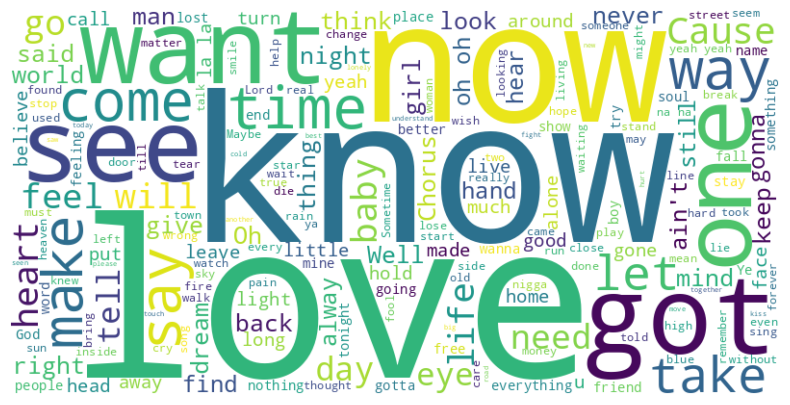

In [ ]:
#joinning all link and suing wordcloud to remove all irrugar words
all_lyrics = "".join(df['text'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_lyrics)
#visialize word cloid
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
#downloading natural language toolkit(nltk)
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
#now creating a fun which take sentce break into one word and remoce if stopword
def preprocess_text(text):
  text = re.sub(r"[^a-zA-Z\s]", "", text)
  text = text.lower()


  tokens = word_tokenize(text)
  tokens = [word for word in tokens if word not in stop_words]
  return " ".join(tokens)


In [ ]:
df['clened_text'] = df['text'].apply(preprocess_text)

In [ ]:
df.head()

,artist,song,text,clened_text
0,Wishbone Ash,No Joke,"Blue skies in my rear-view mirror, \r\nWell, ...",blue skies rearview mirror well ive got mind r...
1,Oingo Boingo,Hold Me Back,"Driving fast and ditching school, breaking all...",driving fast ditching school breaking precious...
2,Insane Clown Posse,12,"12 \r\n""Wake... \r\nRevenge is mine \r\n12 ...",wake revenge mine people die tonight violent j...
3,Primus,Too Many Puppies,Too many puppies are being shot in the dark. ...,many puppies shot dark many puppies trained ba...
4,Marilyn Manson,No Reflection,"Crushing, cheating, changing \r\nAm I deaf or...",crushing cheating changing deaf dead constrict...


In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix  = tfidf_vectorizer.fit_transform(df['clened_text'])

In [ ]:
#show similiarity
cosine_simi = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [ ]:
def recommed_song(song_name, cosine_simi=cosine_simi, df=df, top = 5):
  #idx = df[ df['song'].str.lower() == song_name.lower()].reset_index
  idx = df.index[df['song'].str.lower() == song_name.lower()].tolist()
  if len(idx) == 0:
    return "song not fount"
  idx = idx[0]

  sim_sore = list(enumerate(cosine_simi[idx]))
  sim_sore = sorted(sim_sore, key=lambda x: x[1], reverse=True)
  #use 1 to remove same as cosime is haven 1 to same song and it will be 0 idx
  sim_sore = sim_sore[1:top+1]

  song_idx = [i[0] for i in sim_sore]
  return df[['artist', 'song']].iloc[song_idx]



In [ ]:
df["song"][5]

"That's Why God Made The Movies"

In [ ]:
print("\nRecommedation for the song 'That why god made movies':")
recommed = recommed_song("That's Why God Made The Movies")
print(recommed)


Recommedation for the song 'That why god made movies':
             artist                 song
2568  Conway Twitty         Bye Bye Love
8227       Children       Autumn Lullaby
3908  Eddie Cochran  Goodbye Bye Bye Bye
6213        Nirvana     Run, Rabbit, Run
9789      Kate Bush   She's Leaving Home
